In [1]:
!pip install pandas numpy matplotlib seaborn tensorflow nltk scikit-learn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rcoem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rcoem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rcoem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading and preprocessing data...
Preparing sequences...
Building model...


C:\Users\rcoem\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - loss: 14.2632 - mae: 3.5193
Epoch 1: val_loss improved from inf to 12.59820, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 14.2632 - mae: 3.5193 - val_loss: 12.5982 - val_mae: 3.4617
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 13.8792 - mae: 3.4683
Epoch 2: val_loss improved from 12.59820 to 12.24347, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 13.8792 - mae: 3.4683 - val_loss: 12.2435 - val_mae: 3.4111
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.5628 - mae: 3.4214
Epoch 3: val_loss improved from 12.24347 to 11.82849, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 13.5628 - mae: 3.4214 - val_loss: 11.8285 - val_mae: 3.3508
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 13.2349 - mae: 3.3686
Epoch 4: val_loss improved from 11.82849 to 11.26570, saving model to best_model.keras
1/1

C:\Users\rcoem\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


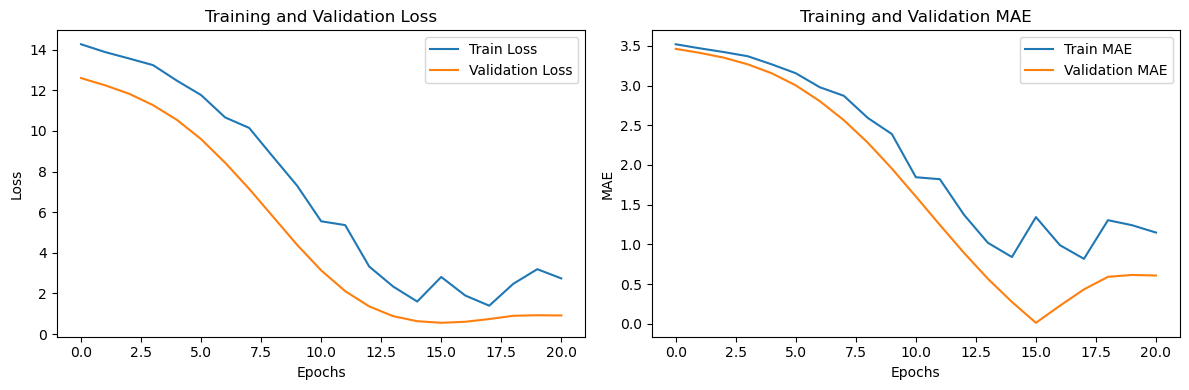

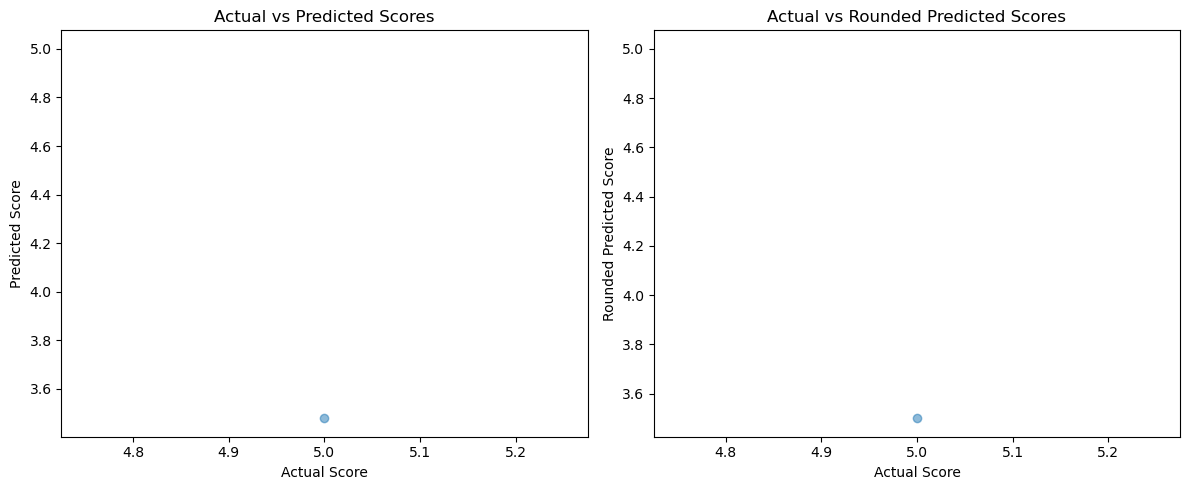

ValueError: `dataset` input should have multiple elements.

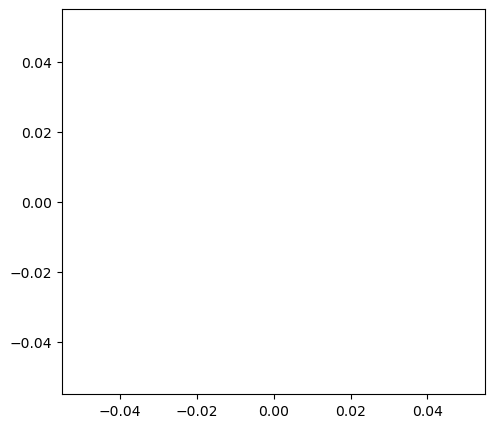

In [2]:
# Subjective Answer Evaluation System
# This notebook implements a deep learning model to evaluate subjective answers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.optimizers import Adam

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the data
def load_data(file_path=None):
    """
    Load data from CSV file or use sample data if file_path is None
    """
    if file_path:
        df = pd.read_csv('new_dataset.csv')
    else:
        # Create sample dataframe based on the provided example
        data = {
            'id': [1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
            'Question': ['What is the role of a prototype?' for _ in range(6)],
            'Desired_answer': ['To simulate the behavior of the actual system.' for _ in range(6)],
            'Student_answer': [
                'High risk problems can be detected.',
                'To simulate portions of the software which are yet to be built.',
                'A prototype program helps to discover requirements.',
                'Defined in the Specification document.',
                'It is used to let the user evaluate developer proposals.',
                'To find problems and solutions.'
            ],
            'score_me': [4, 5, 5, 5, 3, 2],
            'score_other': [3, 5, 3, 5, 3, 2],
            'score_avg': [3.5, 5, 4, 5, 3, 2]
        }
        df = pd.DataFrame(data)
    return df

# Text preprocessing functions
def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, stopwords, and lemmatizing"""
    if not isinstance(text, str):
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Feature engineering
def extract_features(df):
    """Extract features for model training"""
    
    # Preprocess text columns
    df['processed_question'] = df['Question'].apply(preprocess_text)
    df['processed_desired_answer'] = df['Desired_answer'].apply(preprocess_text)
    df['processed_student_answer'] = df['Student_answer'].apply(preprocess_text)
    
    # Calculate text length features
    df['student_answer_length'] = df['Student_answer'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df['desired_answer_length'] = df['Desired_answer'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    df['length_difference'] = abs(df['student_answer_length'] - df['desired_answer_length'])
    
    # Calculate cosine similarity between student answer and desired answer
    def get_cosine_sim(text1, text2):
        if not isinstance(text1, str) or not isinstance(text2, str):
            return 0
        
        # Tokenize and create term frequency vectors
        all_words = set(text1.split() + text2.split())
        vec1 = [text1.split().count(word) for word in all_words]
        vec2 = [text2.split().count(word) for word in all_words]
        
        # Calculate cosine similarity
        vec1 = np.array(vec1).reshape(1, -1)
        vec2 = np.array(vec2).reshape(1, -1)
        
        if np.sum(vec1) == 0 or np.sum(vec2) == 0:
            return 0
            
        return cosine_similarity(vec1, vec2)[0][0]
    
    df['cosine_similarity'] = df.apply(
        lambda row: get_cosine_sim(row['processed_student_answer'], row['processed_desired_answer']), 
        axis=1
    )
    
    # Use 'score_avg' as the target variable
    df['target_score'] = df['score_avg']
    
    return df

# Tokenize and prepare sequences
def prepare_sequences(df, max_words=5000, max_seq_length=100):
    """Tokenize and prepare sequences for LSTM model"""
    
    # Tokenize the text
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['processed_student_answer'].tolist() + df['processed_desired_answer'].tolist())
    
    # Convert texts to sequences
    student_sequences = tokenizer.texts_to_sequences(df['processed_student_answer'])
    desired_sequences = tokenizer.texts_to_sequences(df['processed_desired_answer'])
    
    # Pad sequences
    student_padded = pad_sequences(student_sequences, maxlen=max_seq_length, padding='post')
    desired_padded = pad_sequences(desired_sequences, maxlen=max_seq_length, padding='post')
    
    # Save tokenizer
    with open('answer_tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return student_padded, desired_padded, tokenizer

# Build LSTM model
def build_model(tokenizer, max_seq_length=100, embedding_dim=128):
    """Build a Bidirectional LSTM model with regularization"""
    
    vocab_size = len(tokenizer.word_index) + 1
    
    model = Sequential([
        # First input branch for student answer
        Embedding(vocab_size, embedding_dim, input_length=max_seq_length),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Bidirectional(LSTM(32, kernel_regularizer=l2(0.001))),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='linear')
    ])
    
    # Compile model with Adam optimizer and learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
    return model

# Train model
def train_model(model, X_train, y_train, X_valid, y_valid, epochs=50, batch_size=32):
    """Train the model with early stopping and checkpointing"""
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    model_checkpoint = ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    return history, model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print performance metrics"""
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Round predictions to nearest 0.5
    y_pred_rounded = np.round(y_pred * 2) / 2
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return mse, mae, r2, y_pred, y_pred_rounded

# Visualize results
def visualize_results(history, y_test, y_pred, y_pred_rounded):
    """Visualize training history and prediction results"""
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
    
    # Plot predictions vs actual
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title('Actual vs Predicted Scores')
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rounded, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title('Actual vs Rounded Predicted Scores')
    plt.xlabel('Actual Score')
    plt.ylabel('Rounded Predicted Score')
    
    plt.tight_layout()
    plt.savefig('prediction_results.png')
    plt.show()
    
    # Plot score distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(y_test, bins=9, alpha=0.5, label='Actual', kde=True)
    sns.histplot(y_pred_rounded, bins=9, alpha=0.5, label='Predicted', kde=True)
    plt.title('Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).melt())
    plt.title('Score Distributions (Box Plot)')
    
    plt.tight_layout()
    plt.savefig('score_distribution.png')
    plt.show()

# Save model and prediction
def save_model_and_results(model, tokenizer, df, y_pred, y_pred_rounded):
    """Save the model, tokenizer, and prediction results"""
    
    # Save model
    model.save('subjective_answer_evaluation.keras')
    
    # Save tokenizer
    with open('answer_tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    # Save predictions
    results_df = df.copy()
    results_df['predicted_score'] = y_pred
    results_df['predicted_score_rounded'] = y_pred_rounded
    results_df['error'] = abs(results_df['target_score'] - results_df['predicted_score_rounded'])
    
    results_df.to_csv('prediction_results.csv', index=False)
    
    print("Model saved as 'subjective_answer_evaluation.keras'")
    print("Tokenizer saved as 'answer_tokenizer.pickle'")
    print("Predictions saved as 'prediction_results.csv'")

# Function to create a prediction pipeline
def create_prediction_pipeline(saved_model_path, tokenizer_path, max_seq_length=100):
    """Create a pipeline for making predictions on new data"""
    
    # Load model and tokenizer
    model = load_model(saved_model_path)
    
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    def predict_score(question, desired_answer, student_answer):
        # Preprocess texts
        processed_question = preprocess_text(question)
        processed_desired_answer = preprocess_text(desired_answer)
        processed_student_answer = preprocess_text(student_answer)
        
        # Calculate cosine similarity
        all_words = set(processed_desired_answer.split() + processed_student_answer.split())
        if all_words:
            vec1 = [processed_desired_answer.split().count(word) for word in all_words]
            vec2 = [processed_student_answer.split().count(word) for word in all_words]
            
            vec1 = np.array(vec1).reshape(1, -1)
            vec2 = np.array(vec2).reshape(1, -1)
            
            if np.sum(vec1) > 0 and np.sum(vec2) > 0:
                cosine_sim = cosine_similarity(vec1, vec2)[0][0]
            else:
                cosine_sim = 0
        else:
            cosine_sim = 0
        
        # Convert to sequences and pad
        student_seq = tokenizer.texts_to_sequences([processed_student_answer])
        student_padded = pad_sequences(student_seq, maxlen=max_seq_length, padding='post')
        
        # Make prediction
        prediction = model.predict(student_padded)[0][0]
        
        # Round to nearest 0.5
        rounded_prediction = round(prediction * 2) / 2
        
        # Ensure prediction is in valid range (1-5)
        rounded_prediction = max(1, min(5, rounded_prediction))
        
        return {
            'original_prediction': float(prediction),
            'rounded_prediction': float(rounded_prediction),
            'cosine_similarity': float(cosine_sim)
        }
    
    return predict_score

# Main function to execute the entire workflow
def main():
    # Load data
    print("Loading and preprocessing data...")
    df = load_data()
    
    # Extract features
    df = extract_features(df)
    
    # Prepare sequences
    print("Preparing sequences...")
    student_padded, desired_padded, tokenizer = prepare_sequences(df)
    
    # Extract additional features (optional)
    additional_features = df[['cosine_similarity', 'length_difference']].values
    
    # Combine sequences and additional features
    X = student_padded
    y = df['target_score'].values.reshape(-1, 1)
    
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Build model
    print("Building model...")
    model = build_model(tokenizer)
    
    # Print model summary
    model.summary()
    
    # Train model
    print("Training model...")
    history, trained_model = train_model(model, X_train, y_train, X_valid, y_valid)
    
    # Evaluate model
    print("Evaluating model...")
    mse, mae, r2, y_pred, y_pred_rounded = evaluate_model(trained_model, X_test, y_test)
    
    # Visualize results
    print("Visualizing results...")
    visualize_results(history, y_test, y_pred, y_pred_rounded)
    
    # Save model and results
    print("Saving model and results...")
    save_model_and_results(trained_model, tokenizer, df, y_pred, y_pred_rounded)
    
    # Create prediction pipeline
    print("Creating prediction pipeline...")
    predict_score = create_prediction_pipeline('subjective_answer_evaluation.keras', 'answer_tokenizer.pickle')
    
    # Example prediction
    example_prediction = predict_score(
        "What is the role of a prototype?",
        "To simulate the behavior of the actual system.",
        "A prototype helps in identifying potential issues in the system design."
    )
    
    print("\nExample prediction:")
    print(f"Question: What is the role of a prototype?")
    print(f"Desired answer: To simulate the behavior of the actual system.")
    print(f"Student answer: A prototype helps in identifying potential issues in the system design.")
    print(f"Predicted score: {example_prediction['rounded_prediction']}/5")
    print(f"Cosine similarity: {example_prediction['cosine_similarity']:.4f}")
    
    print("\nModel training and evaluation completed successfully.")

# Execute main function
if __name__ == "__main__":
    main()